In [8]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [9]:
df =pd.read_csv('spam.csv',encoding='latin-1')
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1,inplace=True)
df.columns=['category','text']

In [10]:
#for text analysis
# fro plotting
import matplotlib.pyplot as plt
import seaborn as sns
# import natural language processing packages
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

#spacy-> advances nltk package
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()


In [12]:
# to check for any null or empty files
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
category    5572 non-null object
text        5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


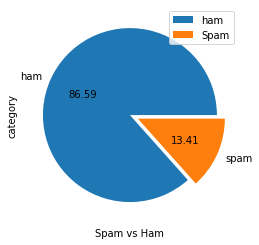

In [18]:
# describing the dataset into spam and ham
df['category'].value_counts().plot(kind = 'pie',explode=[0,0.1],autopct='%.2f')
plt.xlabel('Spam vs Ham')
plt.legend(["ham","Spam"])
plt.show()

In [19]:
display(df.head(n=20))

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


while spliiting the data using train_test_split we have to be careful as our training may contain more normal messages . if it contains more normal messages then it may predict most as ham and we may not know too



 so we have to use accuracy metric that remembers this . we can live by missing some of spam message but we don't want to mark ham as spam.
 so we will be using fbeta accuracy as it uses weighted harmonic mean of precision and recall
 

In [26]:
# some of the top messages 
topM= df.groupby('text')['category'].agg([len,np.max]).sort_values(by = 'len',ascending =False).head(n=5)
print(topM)

                                                    len amax
text                                                        
Sorry, I'll call later                               30  ham
I cant pick the phone right now. Pls send a mes...   12  ham
Ok...                                                10  ham
Your opinion about me? 1. Over 2. Jada 3. Kusru...    4  ham
Wen ur lovable bcums angry wid u, dnt take it s...    4  ham


In [30]:
# studying individual spam words and hand words by grouping them
spam_messages = df[df['category']=='spam']['text']
print(spam_messages)
ham_messages =df[df['category']=='ham']['text']

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: text, Length: 747, dtype: object


In [29]:
# separating major spam and ham words
spam_words = []
ham_words = []


In [43]:
def extractSpam(spam_messages):
    global spam_words
    words =[word.lower() for word in word_tokenize(spam_messages) if word.lower() not in stopwords.words('english')and word.lower().isalpha()]
    spam_words.append(words)
def extractHam(ham_messages):
    global ham_words
    words =[word.lower() for word in word_tokenize(ham_messages) if word.lower() not in stopwords.words('english')and word.lower().isalpha()]
    ham_words.append(words)

spam_messages.apply(extractSpam)
ham_messages.apply(extractHam)
    

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

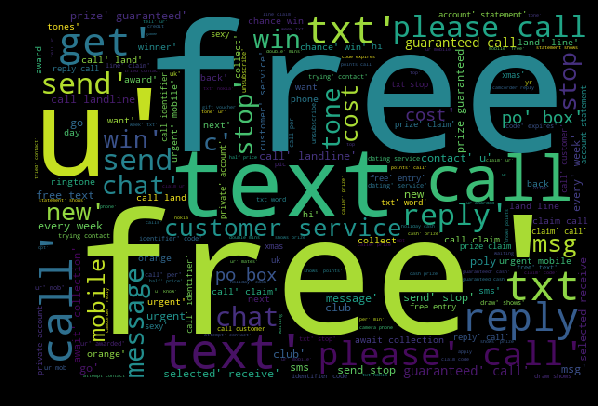

In [50]:
#visually representing data
#converting list to string  using list comprehension for the safe side
# as WordCloud expects str instance
spam_list = ' '.join([str(elem) for elem in spam_words])
ham_list = ' '.join([str(elem) for elem in ham_words])

from wordcloud import WordCloud as WC
spam_wc = WC(width =600,height =400).generate(spam_list)
plt.figure(figsize = (10,8),facecolor = 'k')  # k means black
plt.imshow(spam_wc)# to display as image
plt.show()

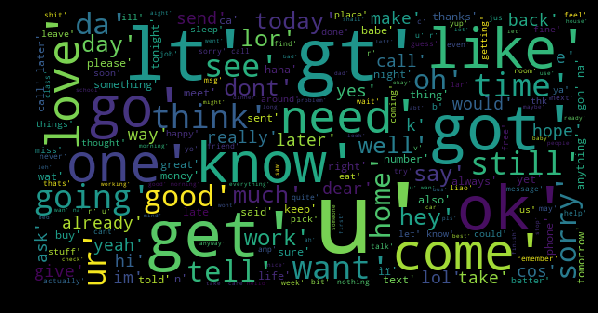

In [49]:
ham_wc = WC(width = 600,height = 300).generate(ham_list)
plt.figure(figsize =(10,8),facecolor = 'k')
plt.imshow(ham_wc)
plt.show()

In [60]:
# top spam words
spam_words = np.array(spam_words)
pd.Series(spam_words).value_counts().head(n = 10)

call      346
free      217
txt       156
ur        144
u         144
mobile    123
text      121
stop      114
claim     113
reply     104
dtype: int64

In [62]:
#top ham words
ham_words = np.array(ham_words)
pd.Series(ham_words).value_counts().head(n=10)

[sorry, call, later]                                                                                                                                              60
[]                                                                                                                                                                40
[ok]                                                                                                                                                              40
[cant, pick, phone, right, pls, send, message]                                                                                                                    24
[okie]                                                                                                                                                            14
[ok, lor]                                                                                                                                                         10
[late]    

In [63]:
#cleaning data to be used in algorithm 
#removing stopwords, punctuations and stemmed words
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

In [64]:
#cleaning text messages
def clean_text(df):
    df = df.translate(str.maketrans('','',string.punctuation))
    words = [stemmer.stem(word) for word in df.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(words)
df['text'] = df['text'].apply(clean_text) # passsing values to functions one by one
df.head(n=10)

,category,text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkts 2...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
5,spam,freemsg hey darl 3 week word back id like fun ...
6,ham,even brother like speak treat like aid patent
7,ham,per request mell mell oru minnaminungint nurun...
8,spam,winner valu network custom select receivea å£9...
9,spam,mobil 11 month u r entitl updat latest colour ...


In [66]:
#converting data into a form that machine learning algorithm can make sense of 
#using COunt vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = cv.fit_transform(df['text'])
print(features.shape)

(5572, 7903)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(features, df['category'], test_size=0.33)

In [72]:
#naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
Multinb = MultinomialNB()
Multinb.fit(X_train,y_train)
Multinb.score(X_test,y_test)
y_predict=Multinb.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.98      1593
        spam       0.88      0.91      0.89       246

    accuracy                           0.97      1839
   macro avg       0.93      0.95      0.94      1839
weighted avg       0.97      0.97      0.97      1839



In [74]:
#so it is quite good
# to run it in  a flask  web application
import joblib
joblib.dump(Multinb,'MNB_spam_model.pkl')

['MNB_spam_model.pkl']

In [3]:
import string
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import SnowballStemmer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split


def predict():

    df =pd.read_csv('spam.csv',encoding='latin-1')
    df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1,inplace=True)
    df.columns=['category','text']
    stemmer = SnowballStemmer('english')
    def clean_text(df):
        df = df.translate(str.maketrans('','',string.punctuation))
        words = [stemmer.stem(word) for word in df.split() if word.lower() not in stopwords.words('english')]
        return ' '.join(words)
    df['text'] = df['text'].apply(clean_text) # passsing values to functions one by one
    
    #converting data into a form that machine learning algorithm can make sense of 
    #using COunt vectorizer
    
    cv =CountVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
    features = cv.fit_transform(df['text'])
    
    X_train, X_test, y_train, y_test = train_test_split(features, df['category'], test_size=0.33)
    #naive bayes classifier
    Multinb = MultinomialNB()
    Multinb.fit(X_train,y_train)
    print(Multinb.score(X_test,y_test))
predict()

0.9847743338771071


In [8]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import SnowballStemmer
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split


from flask import Flask,render_template,url_for,request
import pickle

app = Flask(__name__)

@app.route('/')
def home():
	return render_template('home.html')

@app.route('/predict',methods=['POST'])
def predict():

    df =pd.read_csv('spam.csv',encoding='latin-1')
    df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1,inplace=True)
    df.columns=['category','text']
    stemmer = SnowballStemmer('english')
    def clean_text(df):
        df = df.translate(str.maketrans('','',string.punctuation))
        words = [stemmer.stem(word) for word in df.split() if word.lower() not in stopwords.words('english')]
        return ' '.join(words)
    df['text'] = df['text'].apply(clean_text) # passsing values to functions one by one
    
    #converting data into a form that machine learning algorithm can make sense of 
    #using COunt vectorizer
    
    cv =CountVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
    features = cv.fit_transform(df['text'])
    
    X_train, X_test, y_train, y_test = train_test_split(features, df['category'], test_size=0.33)
    #naive bayes classifier
    Multinb = MultinomialNB()
    Multinb.fit(X_train,y_train)
    Multinb.score(X_test,y_test)
  
    
   
    
    
    if request.method == 'POST':
        message = request.form['message']
        data = [message]
        vect = cv.transform(data).toarray()
        my_prediction = Multinb.predict(vect)
    return render_template('result.html',prediction = my_prediction
    

    



SyntaxError: unexpected EOF while parsing (<ipython-input-8-fb49b589470d>, line 61)